In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
data = pd.read_csv("AB_NYC_2019.csv")


In [3]:
data.head()
#look at the dataset


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()
#basic info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#to check for null values
data.isnull().sum()
#returns column wise count of null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Dropping property without a valid host and a valid name
#data.dropna(['name','host_name'],inplace=True)

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
##We can observe that for columns price,minimum_nights,number_reviews and
#listing count the mean is very small compare to max implying outliers

In [9]:
data.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
#to divide the numerical and categorical columns
cat_columns=['neighbourhood_group','neighbourhood','room_type']

In [11]:
num_col=['latitude','longitude','price','minimum_nights','number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [12]:
#Data Visulaization

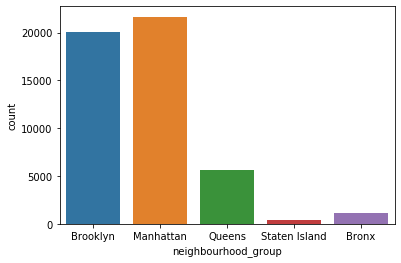

In [13]:
sns.countplot(data["neighbourhood_group"])




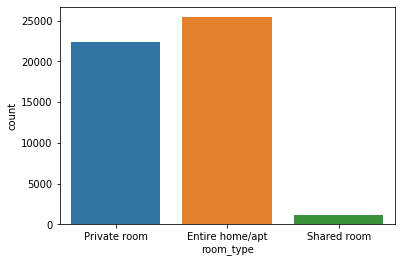

In [14]:
sns.countplot(data['room_type'])

In [15]:
#We can observe reduced preference in shared rooms 

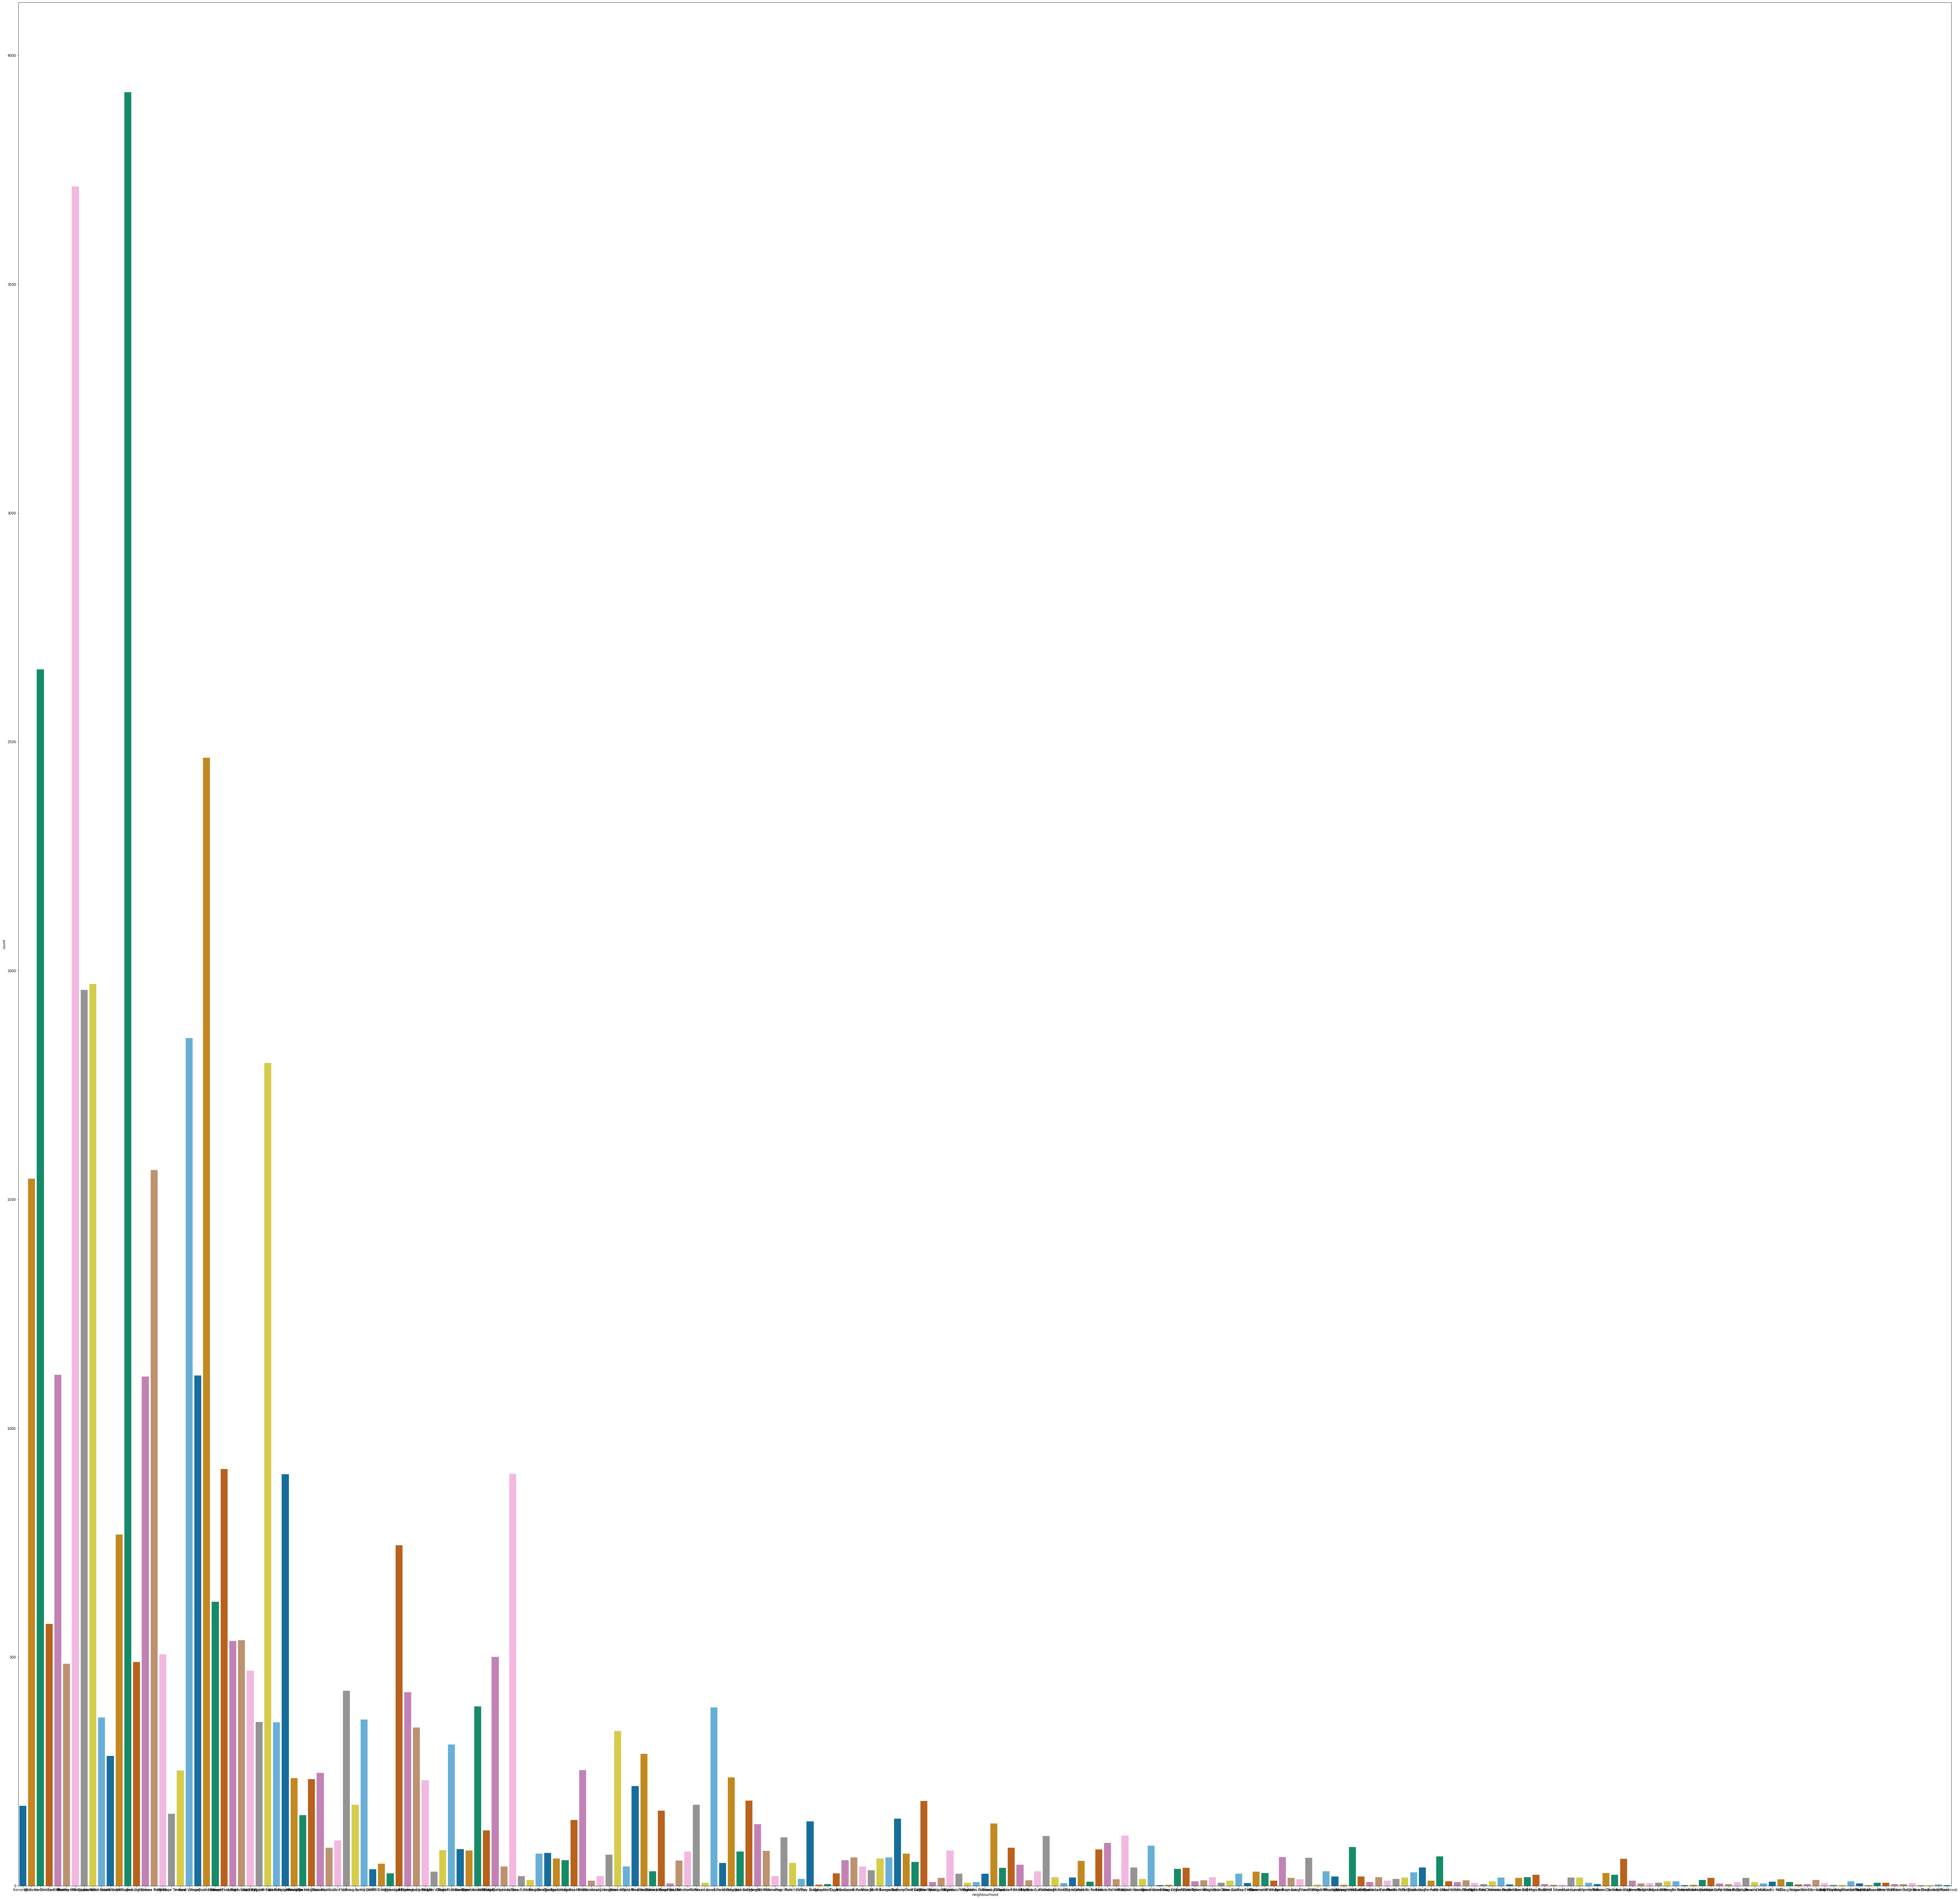

In [16]:
plt.figure(figsize=(100, 100))
a=sns.countplot(data["neighbourhood"], palette="colorblind")


In [17]:
#heavily skewed 

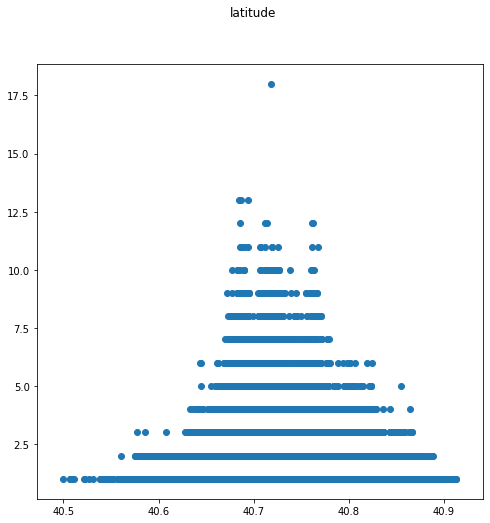

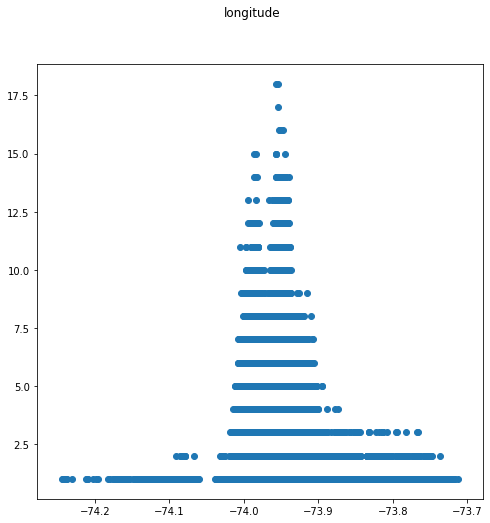

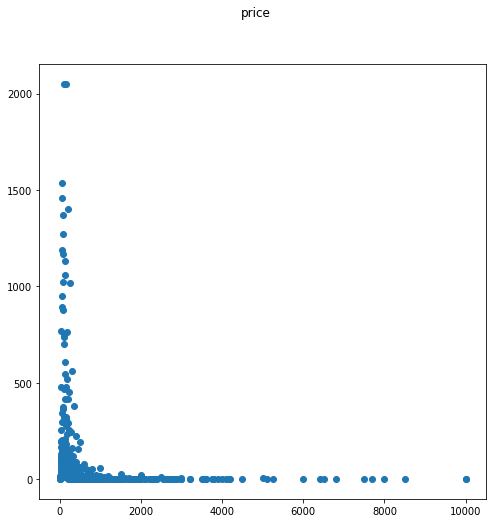

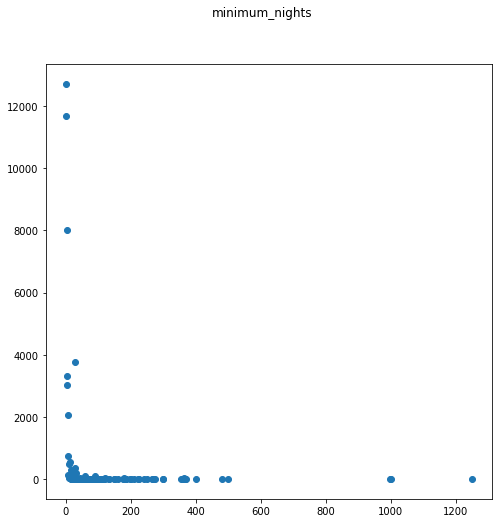

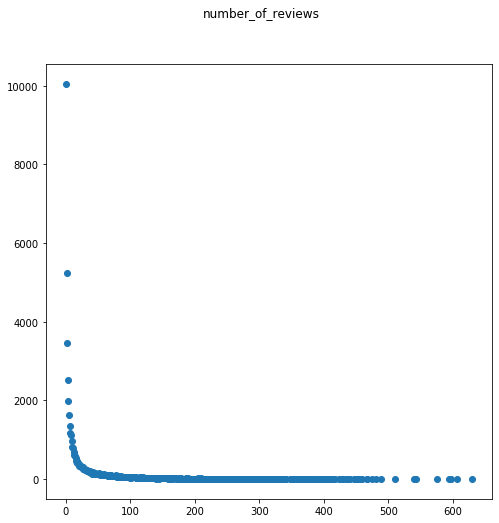

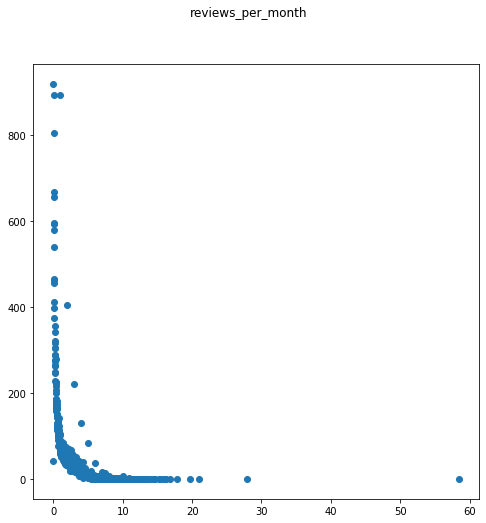

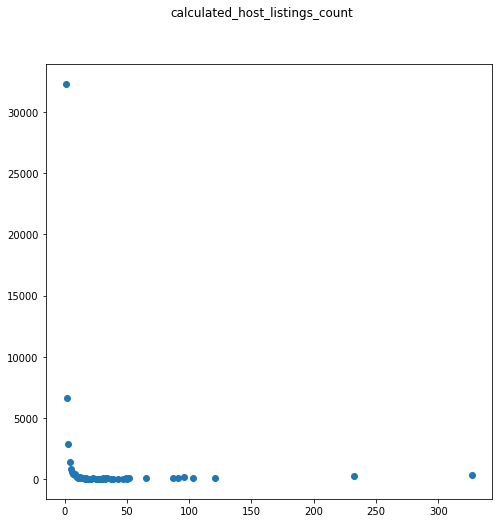

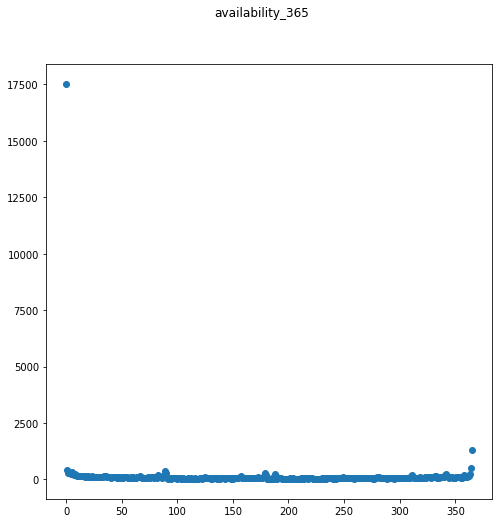

In [18]:
for col in num_col:
    count3=dict(data[col].value_counts())
    names=count3.keys()
    values=count3.values()
    fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
    #axs[0].bar(names, values)
    axs.scatter(names, values)
    #axs[2].box(names, values)
    fig.suptitle(col)

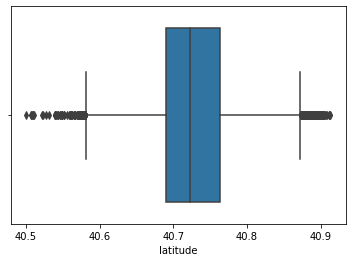

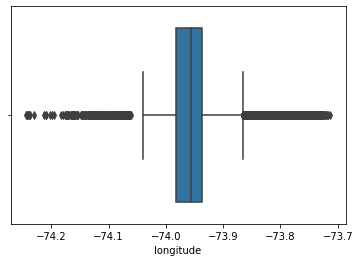

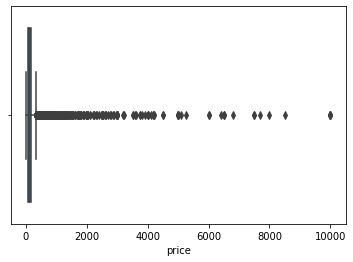

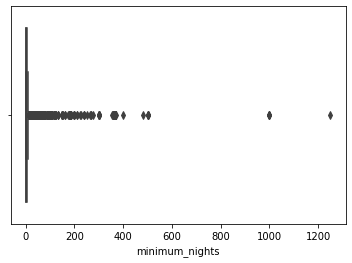

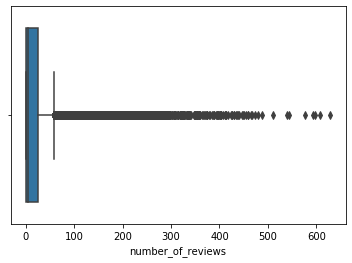

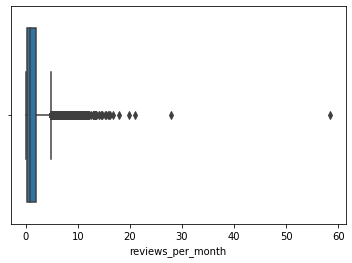

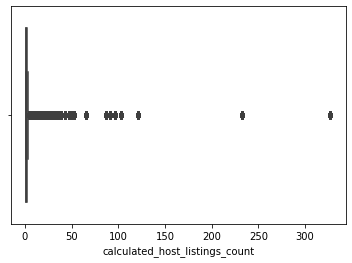

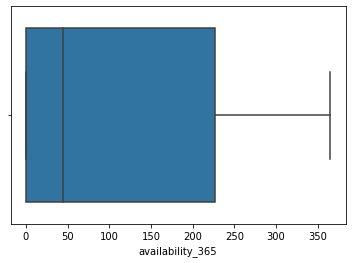

In [19]:
for col in num_col:
    sns.boxplot(data[col])
    plt.show()

In [20]:
#The box plot implies that here are some big outliers
#But on further observation we can conclude that these are misleading

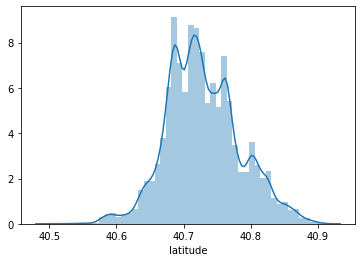

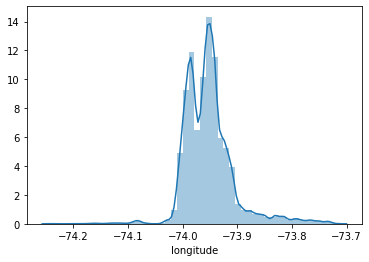

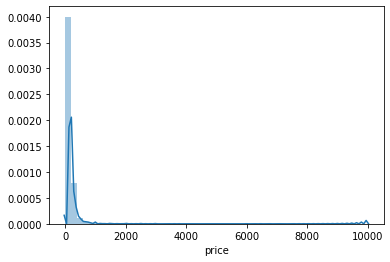

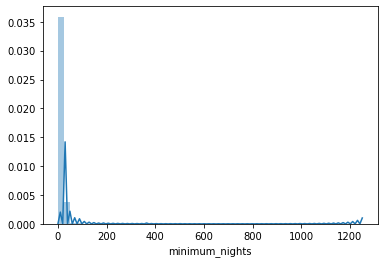

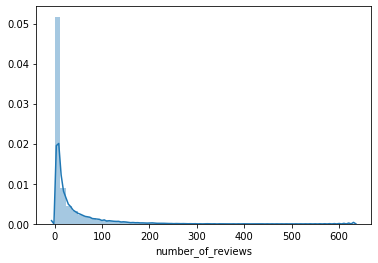

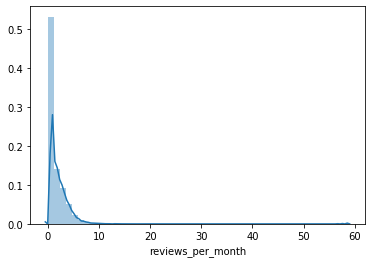

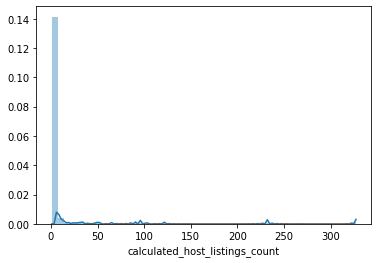

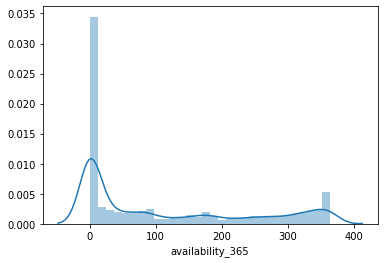

In [21]:
for col in num_col:
    
    sns.distplot(data[col])
    plt.show()

In [22]:
#from the isnull() we observered that there are null values in reviews per month
#Since the distrubution is symmetric for atleast third quartile we can fill null values
#with mean


In [23]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


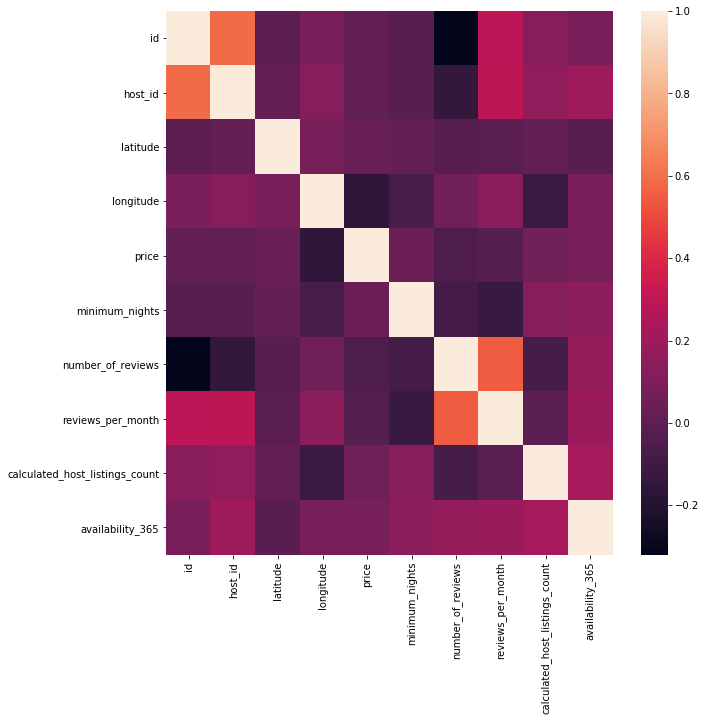

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1295: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


<Figure size 720x720 with 0 Axes>

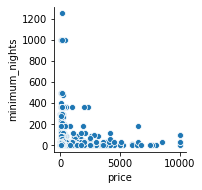

<Figure size 720x720 with 0 Axes>

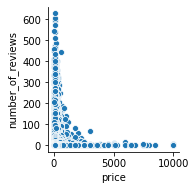

<Figure size 720x720 with 0 Axes>

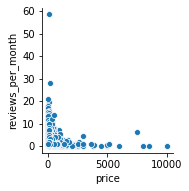

<Figure size 720x720 with 0 Axes>

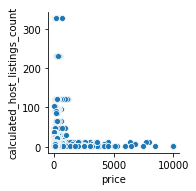

<Figure size 720x720 with 0 Axes>

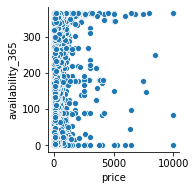

<Figure size 720x720 with 0 Axes>

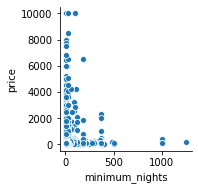

<Figure size 720x720 with 0 Axes>

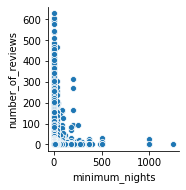

<Figure size 720x720 with 0 Axes>

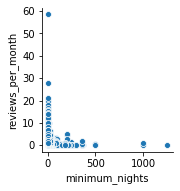

<Figure size 720x720 with 0 Axes>

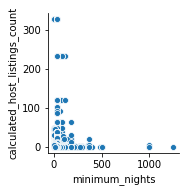

<Figure size 720x720 with 0 Axes>

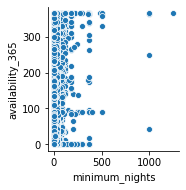

<Figure size 720x720 with 0 Axes>

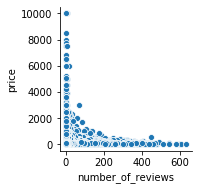

<Figure size 720x720 with 0 Axes>

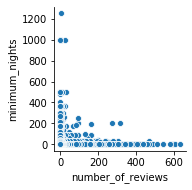

<Figure size 720x720 with 0 Axes>

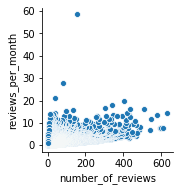

<Figure size 720x720 with 0 Axes>

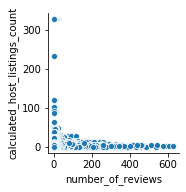

<Figure size 720x720 with 0 Axes>

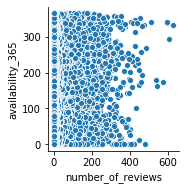

<Figure size 720x720 with 0 Axes>

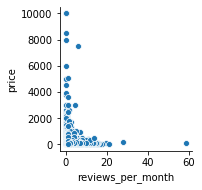

<Figure size 720x720 with 0 Axes>

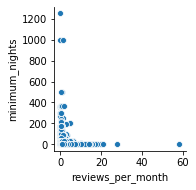

<Figure size 720x720 with 0 Axes>

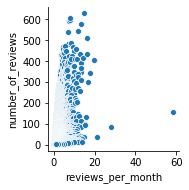

<Figure size 720x720 with 0 Axes>

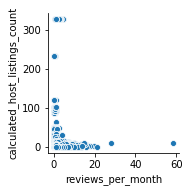

<Figure size 720x720 with 0 Axes>

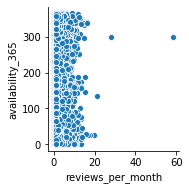

<Figure size 720x720 with 0 Axes>

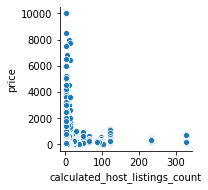

<Figure size 720x720 with 0 Axes>

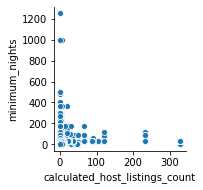

<Figure size 720x720 with 0 Axes>

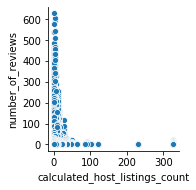

<Figure size 720x720 with 0 Axes>

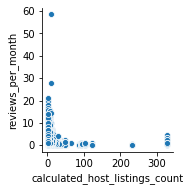

<Figure size 720x720 with 0 Axes>

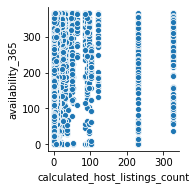

<Figure size 720x720 with 0 Axes>

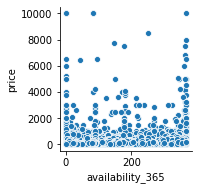

<Figure size 720x720 with 0 Axes>

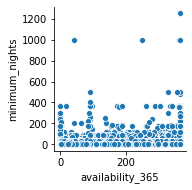

<Figure size 720x720 with 0 Axes>

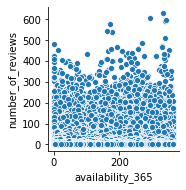

<Figure size 720x720 with 0 Axes>

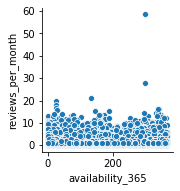

<Figure size 720x720 with 0 Axes>

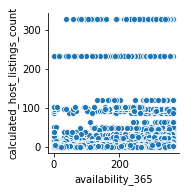

In [25]:
num_cols=['price','minimum_nights','number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
for i in num_cols:
    for j in num_cols:
        if(i!=j):
            plt.figure(figsize=(10,10))
            sns.pairplot(data,x_vars=i,y_vars=j)

In [26]:
#preliminary observations from pair plot
#number of reviews are more for less expensive places
#reviews per month and reviews have a strong correlation 
#minimum number of nights sees more reviews per month


In [27]:
#to plot locaation and price on NY city map

In [28]:
location = pd.read_csv('AB_NYC_2019.csv', usecols=['id', 'latitude', 'longitude', 'price'])
%matplotlib inline

In [29]:
#lat_mean=location['latitude'].mean()
#print(lat_mean)

In [30]:
#long_mean=location['longitude'].mean()
#NY city map inspired from u/skend

In [31]:
lat_mean=-73.925111
long_mean=40.744396
lat = location['latitude']
lon = location['longitude']
price = location['price']

In [32]:
interp_spread = 0.0002
nlat = []
nlon = []
for idx, item in enumerate(price):
    nlat.extend(np.random.uniform(low=lat[idx] - interp_spread, high=lat[idx] + interp_spread, size=(item,)).tolist())
    nlon.extend(np.random.uniform(low=lon[idx] - interp_spread, high=lon[idx] + interp_spread, size=(item,)).tolist())

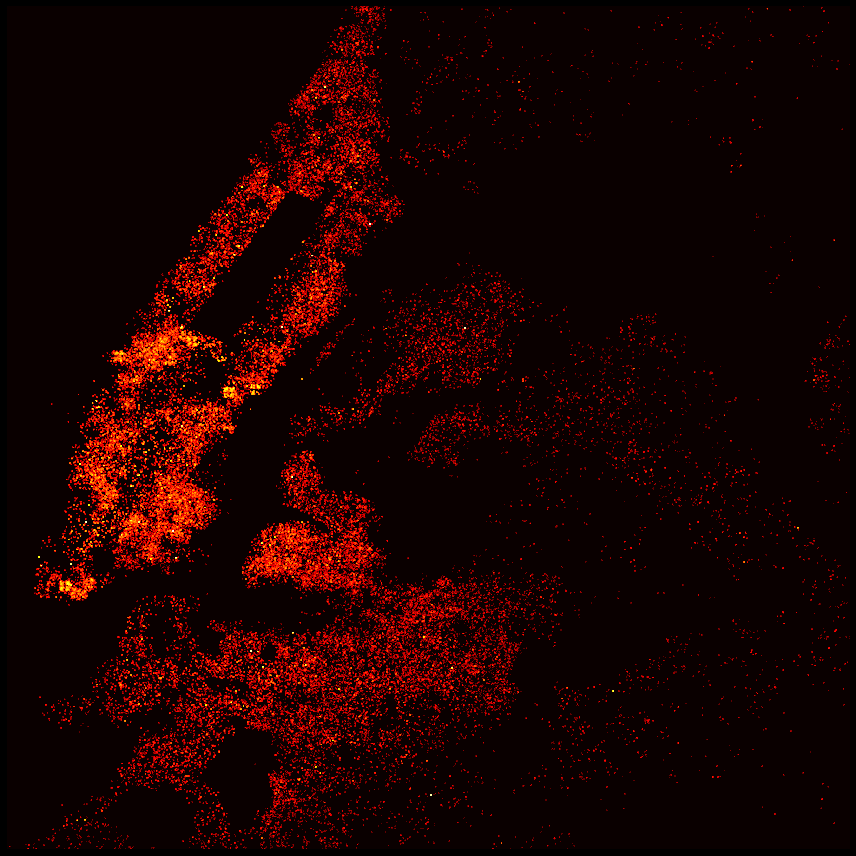

In [33]:

nrbins = 3500
spread = 0.1
hist = np.zeros((nrbins,nrbins))

# Compute the histogram with the longitude and latitude data as a source
hist, x_ranges, y_ranges  = np.histogram2d(x=nlat, y=nlon, bins=nrbins, 
                                          range = [[long_mean - spread, long_mean + spread], [lat_mean - spread, lat_mean + spread]])

# We consider the counts on a logarithmic scale
img = np.log(hist[::-1,:] + 1)

# Plot the counts
plt.figure(figsize=(12,12), facecolor='black')
ax = plt.subplot(1,1,1)
plt.imshow(img, 'hot')
plt.axis('off')
plt.tight_layout()
